In [1]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [2]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(DEVICE)

cpu


In [3]:
transform = transforms.ToTensor()
# 모델을 받을때 numpy나 PIL형태로 받아오기때문에, 이를 텐서의 형태로 변환
# 또한 (Channel, Height, Width)로 바꿔주는 기능도 있음
train_DS = datasets.MNIST(root = './data', train=True, transform=transform, download=True)
test_DS = datasets.MNIST(root = './data', train=False, transform=transform, download=True)

print(train_DS)
print(test_DS)
print(len(train_DS))
print(len(test_DS))

Failed to download (trying next):
HTTP Error 404: Not Found



100.0%


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100.0%


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100.0%


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100.0%

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: ToTensor()
60000
10000


In [4]:
train_DS.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [5]:
train_DS.class_to_idx # 왼쪽 : 클래스 이름 , 오른쪽 레이블

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

In [7]:
train_DS.data.shape

torch.Size([60000, 28, 28])

In [8]:
train_DS.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [10]:
type(train_DS.data[0])

torch.Tensor

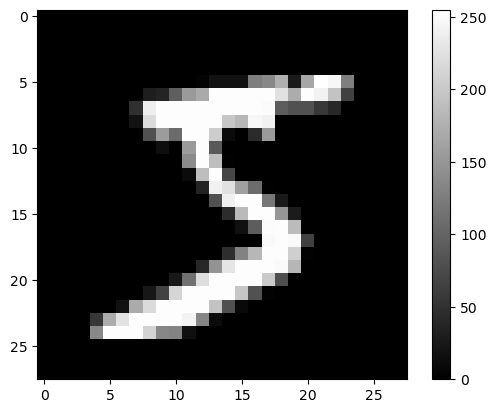

In [9]:
plt.imshow(train_DS.data[0],cmap='gray')
plt.colorbar()

In [11]:
print(train_DS.targets) # 정답(라벨)을 볼 수 있음
print(train_DS.targets.shape)

tensor([5, 0, 4,  ..., 5, 6, 8])
torch.Size([60000])


### 데이터 로더

In [12]:
BATCH_SIZE = 32
train_DL = torch.utils.data.DataLoader(train_DS, batch_size=BATCH_SIZE, shuffle=True)
test_DL = torch.utils.data.DataLoader(test_DS, batch_size=BATCH_SIZE, shuffle=True)

In [13]:
train_DL.dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()

<class 'torch.Tensor'>
torch.Size([60000, 28, 28])
torch.uint8
tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,

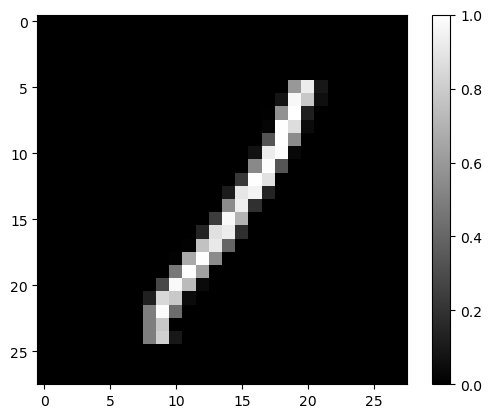

In [14]:
x_batch, y_batch = next(iter(train_DL))
# 데이터 한 묶음 # next(iter(train_DS))
# 배치 크기가 32이므로 32장씩 갖고오게 됨

# ToTensor 의 역할
# 1. Tensor 로 바꾸고
# 2. 개체행렬로 바꾸고 -> 갯수 x 채널 x 크기 x 크기 형태로 변환됨
# 3. 0~1 사이로 바꾸고 (int -> float)
# 이때 데이터를 꺼낼때 적용이 됨

print(type(train_DS.data))
print(train_DS.data.shape)
print(train_DS.data.dtype)
print(train_DS.data[0])

print(type(x_batch))
print(x_batch.shape)
print(x_batch.dtype)
print(x_batch[0])

plt.imshow(x_batch[0].squeeze(), cmap='gray')
plt.colorbar()
print(y_batch[0])

In [15]:
# 모델 정의
from torch import nn

class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fcs = nn.Sequential(nn.Linear(28*28, 100),
                                 nn.ReLU(),
                                 nn.Linear(100, 10))
    def forward(self, x):
        x = torch.flatten(x, start_dim=1)
        # (32,1,28,28)에서 1차원부터 쭉 펴는것
        x = self.fcs(x)
        return x

In [16]:
# flatten 확인
x_batch, _ = next(iter(train_DL))
print(x_batch.shape)
flat_images = torch.flatten(x_batch)
print(flat_images.shape)
flat_images2 = torch.flatten(x_batch, start_dim=1)
print(flat_images2.shape)

torch.Size([32, 1, 28, 28])
torch.Size([25088])
torch.Size([32, 784])


In [17]:
model = MLP().to(DEVICE)
print(model)
x_batch, _ = next(iter(train_DL))
print(model(x_batch.to(DEVICE)).shape)

MLP(
  (fcs): Sequential(
    (0): Linear(in_features=784, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=10, bias=True)
  )
)
torch.Size([32, 10])


In [18]:
from torch import optim

LR = 1e-3
EPOCH = 5
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LR)

def Train(model, train_DL, criterion, optimizer, EPOCH):

    loss_history = []
    NoT = len(train_DL.dataset) # The number of training data

    model.train() # train mode로 전환
    for ep in range(EPOCH):
        rloss = 0 # running loss
        for x_batch, y_batch in train_DL:
            x_batch = x_batch.to(DEVICE)
            y_batch = y_batch.to(DEVICE)
            # inference
            y_hat = model(x_batch)
            # loss
            loss = criterion(y_hat, y_batch)
            # update
            optimizer.zero_grad() # gradient 누적을 막기 위한 초기화
            loss.backward() # backpropagation
            optimizer.step() # weight update
            # loss accumulation
            loss_b = loss.item() * x_batch.shape[0]
            # batch의 크기에 따라 곱해주는 것, 배치크기가 마지막에 다르게 들어올수 있으니
            rloss += loss_b # running loss

        # print loss
        loss_e = rloss/NoT # epoch loss
        loss_history += [loss_e]
        print(f"Epoch: {ep+1}, train loss: {loss_e:.3f}")
        print("--"*20)

    return loss_history

In [27]:
loss_history=Train(model, train_DL, criterion, optimizer, EPOCH)

Epoch: 1, train loss: 0.047
----------------------------------------
Epoch: 2, train loss: 0.040
----------------------------------------
Epoch: 3, train loss: 0.032
----------------------------------------
Epoch: 4, train loss: 0.027
----------------------------------------
Epoch: 5, train loss: 0.022
----------------------------------------


### 주의할점
CrossEntropyLoss를 사용할때는 모델 마지막에 Softmax를 쓰면 안된다.
nn.CrossEntropyLoss를 구현할때 파이토치에서 그렇게 구현을 해놓음

In [25]:
# cross entropy 구하는 여러가지 방법
import torch.nn.functional as F

y_hat = torch.randn(3, 5) # data는 세 개, 5 종류로 분류하는 문제 가정
print(y_hat) # 가로 축으로 합이 1이 아님, 즉, softmax 등과 전
y_batch = torch.randint(5, (3,))
print(y_batch)

# 방법 1
loss = F.cross_entropy(y_hat, y_batch) # softmax가 내장
print(loss)

# 방법 2
criterion = nn.CrossEntropyLoss() # softmax가 내장
print(criterion(y_hat, y_batch))

# 방법 3
soft = nn.Softmax(dim=1)
y_hat_soft = soft(y_hat)
print(y_hat_soft)
loss = 0
for i, val in enumerate(y_hat_soft):
    print(i,val)
    loss += -torch.log(val[y_batch[i]])
print(loss/3) # 평균이 내장되어있음을 알 수 있다

tensor([[ 1.0529,  2.4880, -0.2182, -0.9767, -1.1292],
        [-1.8999,  0.9779, -1.2299,  1.6144,  0.6783],
        [-0.9172, -0.0781, -2.5660, -0.0542,  0.0377]])
tensor([3, 2, 4])
tensor(2.8329)
tensor(2.8329)
tensor([[0.1747, 0.7337, 0.0490, 0.0230, 0.0197],
        [0.0148, 0.2633, 0.0290, 0.4977, 0.1952],
        [0.1180, 0.2731, 0.0227, 0.2797, 0.3066]])
0 tensor([0.1747, 0.7337, 0.0490, 0.0230, 0.0197])
1 tensor([0.0148, 0.2633, 0.0290, 0.4977, 0.1952])
2 tensor([0.1180, 0.2731, 0.0227, 0.2797, 0.3066])
tensor(2.8329)


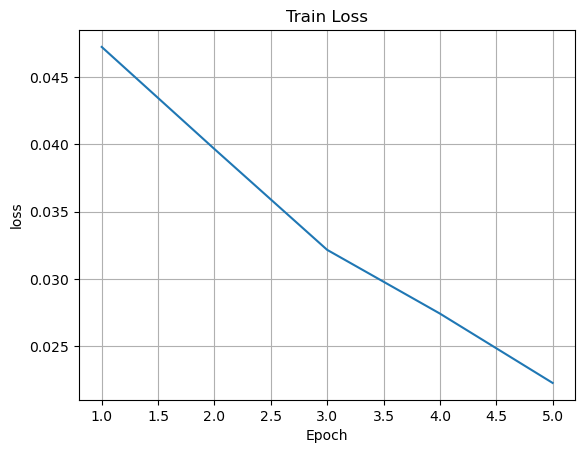

In [28]:
plt.plot(range(1,EPOCH+1), loss_history)
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.title("Train Loss")
plt.grid()

### 모델 저장하고 불러오기

In [29]:
# save dict 저장하기 # 이게 권장
save_model_path = './mlp.pt'
torch.save(model.state_dict(), save_model_path)

In [33]:
# 불러오기
load_model = MLP().to(DEVICE)
load_model.load_state_dict(torch.load(save_model_path,map_location = DEVICE))

<All keys matched successfully>

In [ ]:
# 전체 저장하는법
save_path = 'entire_model.pt'
torch.save(model, save_path)

# 불러오기
load_model = torch.load(save_path)
load_model.eval() # 추론 모드로 됨환

In [34]:
model.state_dict()

OrderedDict([('fcs.0.weight',
              tensor([[-0.0320,  0.0016, -0.0231,  ..., -0.0188, -0.0016, -0.0212],
                      [ 0.0107,  0.0033, -0.0174,  ..., -0.0039,  0.0153, -0.0031],
                      [ 0.0150,  0.0245,  0.0027,  ...,  0.0350,  0.0315,  0.0173],
                      ...,
                      [ 0.0193, -0.0312,  0.0104,  ..., -0.0017,  0.0045, -0.0269],
                      [-0.0046, -0.0034,  0.0237,  ..., -0.0071,  0.0256, -0.0089],
                      [ 0.0124,  0.0139, -0.0342,  ..., -0.0061,  0.0143,  0.0279]])),
             ('fcs.0.bias',
              tensor([-0.0561,  0.0068,  0.1213, -0.0115,  0.1859,  0.3568, -0.1046, -0.1507,
                       0.3237, -0.1524,  0.0340,  0.2572,  0.2218, -0.0915,  0.0822,  0.1057,
                      -0.1798, -0.2713,  0.0109,  0.0542, -0.0153, -0.1451,  0.0080,  0.1232,
                       0.0355,  0.1032,  0.0797,  0.0126, -0.0999, -0.1013,  0.1990,  0.0958,
                      -0.0595,  

In [35]:
def Test(model, test_DL):
    model.eval() # test mode로 전환
    with torch.no_grad():
        rcorrect = 0
        for x_batch, y_batch in test_DL:
            x_batch = x_batch.to(DEVICE)
            y_batch = y_batch.to(DEVICE)
            # inference
            y_hat = model(x_batch)
            # corrects accumulation
            pred = y_hat.argmax(dim=1)
            corrects_b = torch.sum(pred == y_batch).item()
            rcorrect += corrects_b
        accuracy_e = rcorrect/len(test_DL.dataset)*100
    print(f"Test accuracy: {rcorrect}/{len(test_DL.dataset)} ({accuracy_e:.1f}%)")
    return round(accuracy_e,1)

In [36]:
Test(model, test_DL)

Test accuracy: 9785/10000 (97.9%)


97.9